# Read a file from an remote OPeNDAP server and make a contour plot of the data

In this example, we demonstrate:
1. How to read a netcdf file in Python using `xarray` from a remote OPeNDAP server
2. How to make a contour plot of the data

## Data
We will read data from the North American Multi-model Ensemble (NMME) database.  Specifially, we will read the sea surface temperature (SST) data hindcast data for the COLA-RSMAS-CCSM4 model.

The NMME public database is hosted on the International Research Institute for Climate and Society (IRI) data server http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/

## Python import statements
You must first import the Python packages you wish to use. 
This is a common set of basic import statments you can start with.

In [7]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

Set the path and filename

In [8]:
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.COLA-RSMAS-CCSM4/.MONTHLY/.sst/dods'

Read the data using `xarray` `open_dataset` http://xarray.pydata.org/en/stable/generated/xarray.open_dataset.html

In [9]:
ds =xr.open_dataset(url, decode_times=False)

When you read in data using `xarray`, it creates an object called an `xarray.Dataset` which consists of your data and all its metadata. If we print out our `Dataset` which is called `ds`, its similar to doing a `ncdump -h` on a netcdf file. You can see all the dimensions, size, and attributes of the data in the file.

In [10]:
ds

<xarray.Dataset>
Dimensions:  (L: 12, M: 10, S: 457, X: 360, Y: 181)
Coordinates:
  * S        (S) float32 264.0 265.0 266.0 267.0 ... 717.0 718.0 719.0 720.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * M        (M) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    sst      (S, L, M, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

If you want to access just the surface air tempeature (tas) data itself, without all the gloal attributes, you can do that by supplying the name of the variable

In [11]:
ds['sst']

<xarray.DataArray 'sst' (S: 457, L: 12, M: 10, Y: 181, X: 360)>
[3573374400 values with dtype=float32]
Coordinates:
  * S        (S) float32 264.0 265.0 266.0 267.0 ... 717.0 718.0 719.0 720.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * M        (M) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * L        (L) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    defaultvalue:   720.0
    pointwidth:     0
    long_name:      Sea Surface Temperature
    cell_methods:   time: mean
    units:          Celsius_scale
    spatial_op:     Conservative remapping: 1st order: destarea: NCL: /homes/...
    lat:            89.5
    standard_name:  sea_surface_temperature
    expires:        1580517720

The NMME data dimensions correspond to the following: X=lon,L=lead,Y=lat,M=ensemble member, S=initialization time.

Let's make a very simple contour plot to convince ourselves that we indeed have surface air temperature data. 
1. We will use the `matplotlib` `plt.contourf` function for a filed contour plot.  It works very similar to Matlab plotting functions.  
2. We can only make a contour plot with 2-D data (Y,X) and we have 4-D (S,L,M,Y,X), so we will need to access a single time using brackets notation. 
3. We will want to add a colorbar to see that values are reasonable

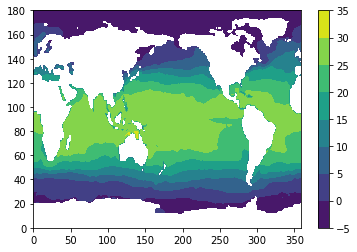

In [12]:
plt.contourf(ds['sst'][0,0,0,:,:])
plt.colorbar()

This is a very simple plot, but it looks like we have global temperature data.  More details on how to plot maps, make nice lables, and colors, can be found in other examples.